In [1]:
import tensorflow as tf

In [2]:
tf.config.set_visible_devices([], 'gpu')

In [3]:
def _nes(input, f, n=10, sigma=0.1, antithetic=True):
    grad = tf.convert_to_tensor(np.zeros_like(input))

    for _ in range(n):
        d = tf.random.normal(input.shape)
        grad += d * tf.reduce_mean(f(input + d * sigma))
        if antithetic:
            grad -= d * tf.reduce_mean(f(input - d * sigma))
        
    grad /= sigma * n * (antithetic + 1) 
    return grad


In [4]:
m = tf.keras.Sequential([
    tf.keras.Input((2)),
    tf.keras.layers.Dense(1)
])

In [11]:
m.input

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_1')>

In [10]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [15]:
m(tf.convert_to_tensor([[1,1], [1, 2]]))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-1.3314   ],
       [-2.4061174]], dtype=float32)>

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
n = 11
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)

X, Y = np.meshgrid(x, y)
G = np.concatenate((X.reshape((-1,1)), Y.reshape((-1,1))), axis=1)

In [8]:
Z = m(G).numpy().reshape((n, n))

In [62]:
Z.shape

(11, 11)

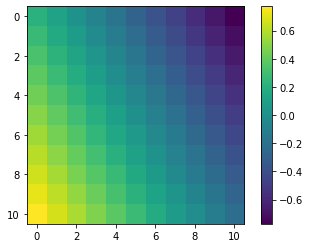

In [9]:
plt.imshow(Z)
plt.colorbar()

In [74]:
X.shape

(11, 11)

In [93]:
grad[0].shape

TensorShape([1, 2])

(-1.0, 1.0, -1.0, 1.0)

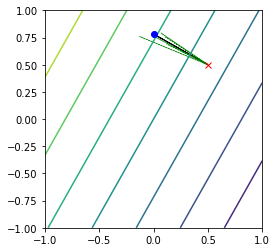

In [19]:
p = tf.convert_to_tensor([[0.5, 0.5]])
with tf.GradientTape() as tape:
    tape.watch(p)
    loss = m(p)
grad = tape.gradient(loss, [p])[0]

nes_grads = [_nes(p, m, 100, 0.01) for _ in range(5)]

plt.contour(X, Y, Z)
q = p + grad
plt.plot(p[0,0], p[0,1], 'rx')
plt.plot(q[0,0], q[0,1], 'bo')
plt.arrow(*p[0], *grad[0])
for grad in nes_grads:
    plt.arrow(*p[0], *grad[0], linestyle='dotted', color='green')
    
plt.axis('square')